# Árboles de Decisión


## Los conjuntos de datos de los pingüinos


###  Conjunto de datos de clasificación

 Usaremos este conjunto de datos en el entorno de clasificación para predecir las especies de pingüinos a partir de información anatómica.

 Cada pingüino pertenece a una de las tres especies siguientes: Adelie, Gentoo y Chinstrap. Vea la siguiente ilustración que muestra las tres especies diferentes de pingüinos:

![](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

 Este problema es un problema de clasificación ya que el objetivo es categórico. Limitaremos nuestros datos de entrada a un subconjunto de las características originales para simplificar nuestras explicaciones al presentar el algoritmo del árbol de decisión. De hecho, utilizaremos características basadas en la medida del culmen de los pingüinos. Puedes aprender más sobre el culmen de los pingüinos con la siguiente ilustración:

![](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png)

 Comenzaremos cargando este subconjunto del conjunto de datos.


In [42]:
import pandas as pd

penguins = pd.read_csv("./penguins_classification.csv")

culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"


Revisemos el conjunto de datos con más detalle.


In [43]:
penguins.head()

,Culmen Length (mm),Culmen Depth (mm),Species
0,39.1,18.7,Adelie
1,39.5,17.4,Adelie
2,40.3,18.0,Adelie
3,36.7,19.3,Adelie
4,39.3,20.6,Adelie



Como tenemos pocas muestras, podemos consultar un diagrama de dispersión para observar la distribución de las muestras.


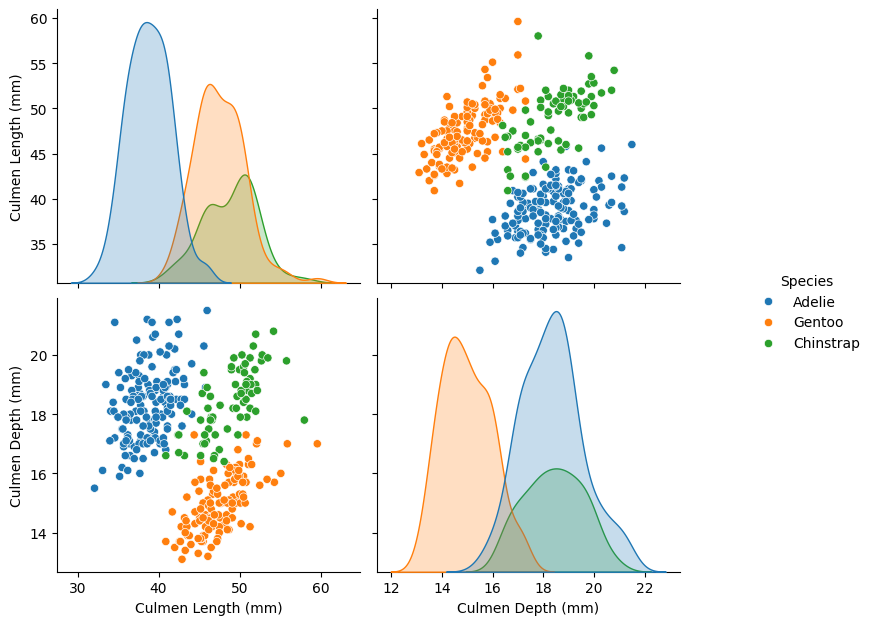

In [44]:
import seaborn as sns

pairplot_figure = sns.pairplot(penguins, hue="Species")
pairplot_figure.fig.set_size_inches(9, 6.5)


Primero, verifiquemos las distribuciones de características observando los gráficos diagonales del diagrama de pares. Podemos deducir las siguientes intuiciones:
-  La especie Adelia se puede diferenciar de las especies Gentoo y Chinstrap dependiendo de la longitud del culmen;
-  La especie Gentoo se puede diferenciar de las especies Adelie y Chinstrap dependiendo de la profundidad del culmen.

###  Conjunto de datos de regresión

 En un entorno de regresión, el objetivo es una variable continua en lugar de categorías. Aquí, utilizamos dos características del conjunto de datos para crear dicho problema: la longitud de la aleta se usará como datos y la masa corporal será el objetivo. En resumen, queremos predecir la masa corporal utilizando la longitud de la aleta.

 Cargaremos el conjunto de datos y visualizaremos la relación entre la longitud de las aletas y la masa corporal de los pingüinos.


In [45]:
penguins = pd.read_csv("./penguins_regression.csv")

feature_name = "Flipper Length (mm)"
target_column = "Body Mass (g)"

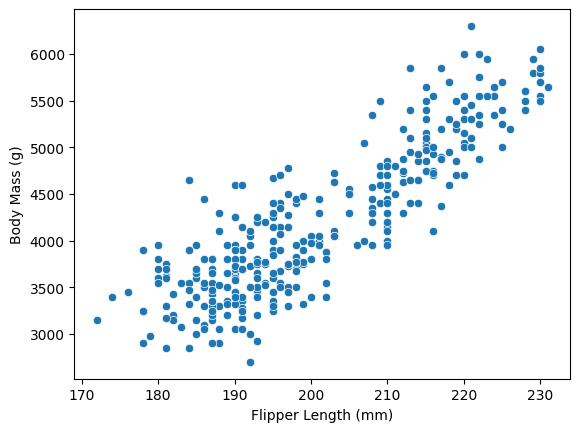

In [46]:
_ = sns.scatterplot(data=penguins, x=feature_name, y=target_column)


Aquí nos enfrentamos a un problema de regresión porque nuestro objetivo es una variable continua que oscila entre 2,7 kg y 6,3 kg. En el diagrama de dispersión anterior, observamos que tenemos una relación lineal entre la longitud de la aleta y la masa corporal. Cuanto más larga es la aleta de un pingüino, más pesado es el pingüino.



## Árbol de decisión de clasificación

 Ilustraremos cómo el árbol de decisión ajusta los datos con un problema de clasificación simple utilizando el conjunto de datos de pingüinos.


In [47]:
import pandas as pd

penguins = pd.read_csv("./penguins_classification.csv")
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"


Además, dividimos los datos en dos subconjuntos para investigar cómo los árboles predecirán valores basados en un conjunto de datos fuera de muestra.


In [48]:
from sklearn.model_selection import train_test_split

data, target = penguins[culmen_columns], penguins[target_column]

data_train, data_test, target_train, target_test = train_test_split(data, target, random_state=0)


Un clasificador lineal definirá una separación lineal para dividir clases utilizando una combinación lineal de las características de entrada. En nuestro espacio bidimensional, significa que un clasificador lineal definirá algunas líneas oblicuas que separan mejor nuestras clases. A continuación definimos una función que, dado un conjunto de puntos de datos y un clasificador, trazará los límites de decisión aprendidos por el clasificador.

 Así, para un clasificador lineal, obtendremos los siguientes límites de decisión. Estas líneas límite indican dónde el modelo cambia su predicción de una clase a otra.


In [49]:
from sklearn.linear_model import LogisticRegression

linear_model = LogisticRegression()
linear_model.fit(data_train, target_train)

LogisticRegression()

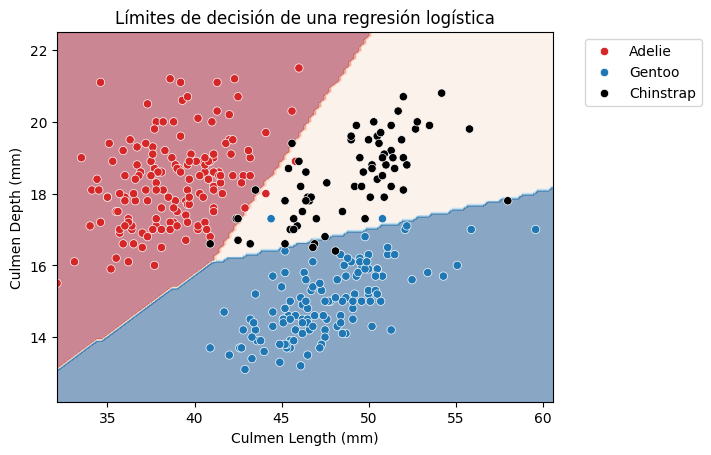

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.inspection import DecisionBoundaryDisplay

# create a palette to be used in the scatterplot
palette = ["tab:red", "tab:blue", "black"]

DecisionBoundaryDisplay.from_estimator(
    linear_model, data_train, response_method="predict", cmap="RdBu", alpha=0.5
)
sns.scatterplot(
    data=penguins,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=palette,
)
# put the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Límites de decisión de una regresión logística")


Vemos que las líneas son una combinación de las características de entrada ya que no son perpendiculares a un eje específico. De hecho, esto se debe a la parametrización del modelo que vimos en el cuaderno anterior, controlada por los pesos y la intersección del modelo.

 Además, parece que el modelo lineal sería un buen candidato para este problema ya que proporciona buena precisión.


In [51]:
linear_model.fit(data_train, target_train)
test_score = linear_model.score(data_test, target_test)
print(f"Accuracy de LogisticRegression: {test_score:.2f}")

Accuracy de LogisticRegression: 0.98



A diferencia de los modelos lineales, los árboles de decisión son modelos no paramétricos: no están controlados por una función de decisión matemática y no tienen pesos ni interceptos que deban optimizarse.

 De hecho, los árboles de decisión dividirán el espacio considerando una sola característica a la vez. Ilustremos este comportamiento haciendo que un árbol de decisión haga una única división para dividir el espacio de características.


In [52]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=3)

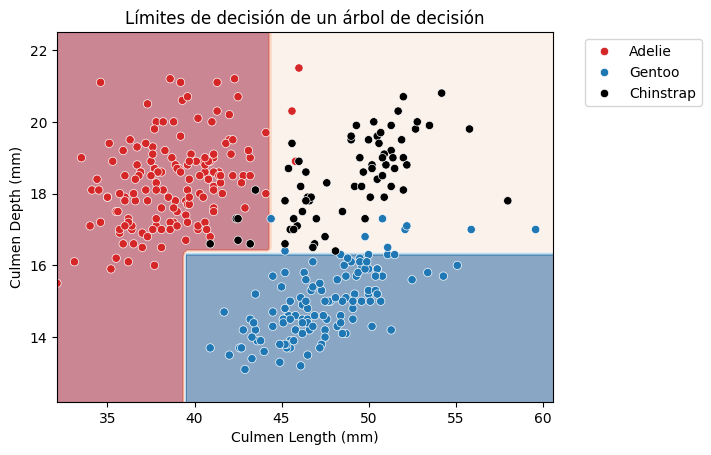

In [53]:
DecisionBoundaryDisplay.from_estimator(
    tree, data_train, response_method="predict", cmap="RdBu", alpha=0.5
)
sns.scatterplot(
    data=penguins,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=palette,
)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("Límites de decisión de un árbol de decisión")


Las particiones encontradas por el algoritmo separan los datos a lo largo del eje "Profundidad del culmen", descartando la característica "Longitud del culmen". Por lo tanto, destaca que un árbol de decisión no utiliza una combinación de características al realizar una división. Podemos observar más en profundidad la estructura del árbol.


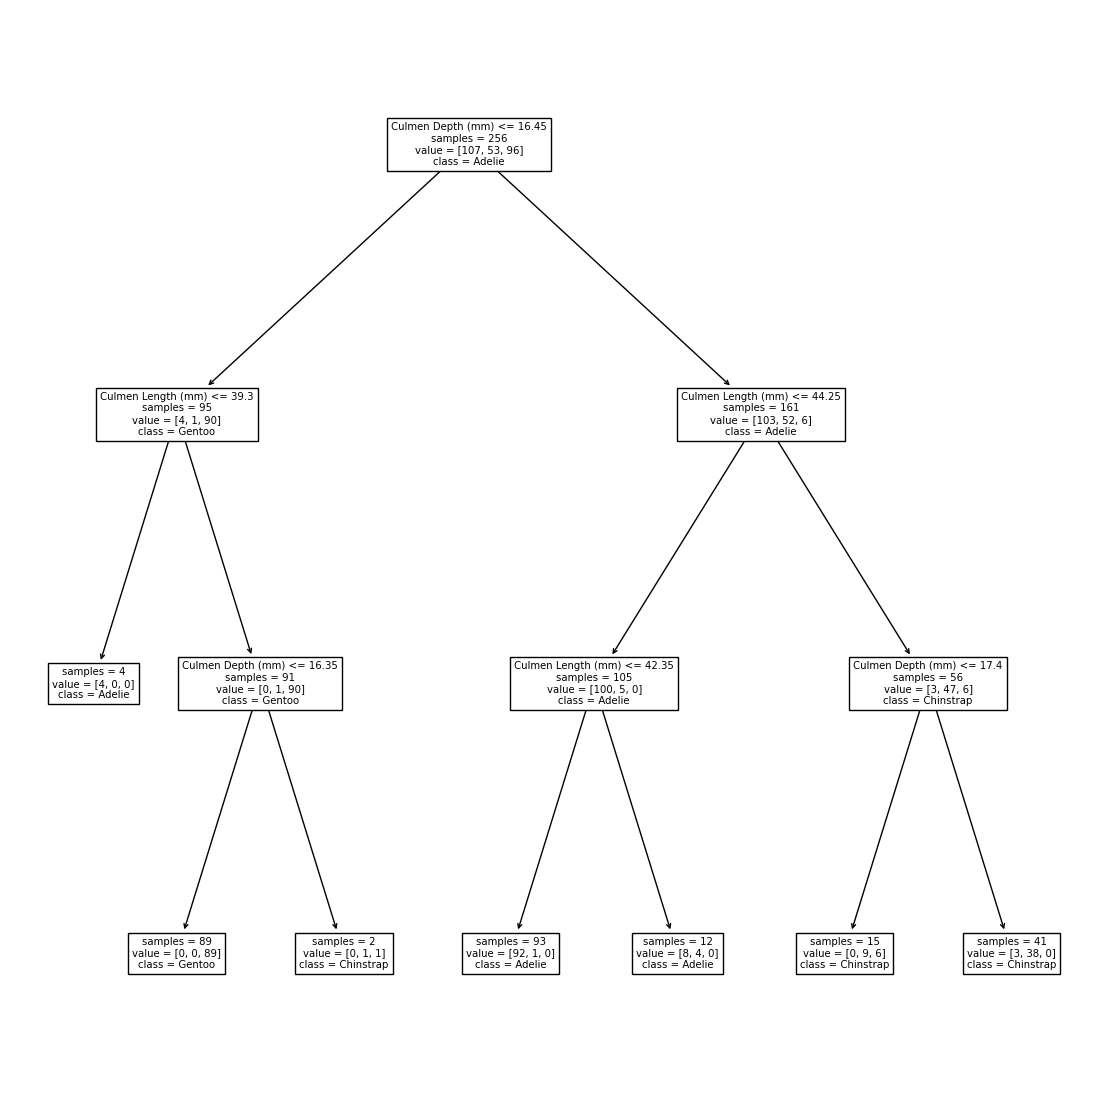

In [54]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(14, 14))
_ = plot_tree(
    tree,
    feature_names=culmen_columns,
    class_names=tree.classes_,
    impurity=False,
    ax=ax,
)


Vemos que la división se realizó en la profundidad del culmen. El conjunto de datos original se subdividió en 2 conjuntos según la profundidad del culmen (inferior o superior a 16,45 mm).

 Esta partición del conjunto de datos minimiza las diversidades de clases en cada subpartición. Esta medida también se conoce como **criterio** y es un parámetro configurable.

 Si miramos más de cerca la partición, vemos que la muestra superior a 16,45 pertenece principalmente a la clase Adelia. Si analizamos los valores, observamos 103 individuos Adelia en este espacio. También contamos 52 muestras de Chinstrap y 6 muestras de Gentoo. Podemos hacer una interpretación similar para el tabique definido por un umbral inferior a 16,45 mm. En este caso, la clase más representada es la especie Gentoo.

 Veamos cómo funcionaría nuestro árbol como predictor. Comencemos con un caso donde la profundidad del culmen es inferior al umbral.


In [55]:
sample_1 = pd.DataFrame({"Culmen Length (mm)": [0], "Culmen Depth (mm)": [15]})
tree.predict(sample_1)

array(['Adelie'], dtype=object)


La clase prevista es Gentoo. Ahora podemos comprobar qué ocurre si pasamos un culmen de profundidad superior al umbral.


In [56]:
sample_2 = pd.DataFrame({"Culmen Length (mm)": [0], "Culmen Depth (mm)": [17]})
tree.predict(sample_2)

array(['Adelie'], dtype=object)


En este caso, el árbol predice la especie Adelia.

 Por tanto, podemos concluir que un clasificador de árbol de decisión predecirá la clase más representada dentro de una partición.

 Durante el entrenamiento, contamos las muestras en cada partición y también podemos calcular la probabilidad de pertenecer a una clase específica dentro de esta partición.


In [57]:
y_pred_proba = tree.predict_proba(sample_2)
y_proba_class_0 = pd.Series(y_pred_proba[0], index=tree.classes_)

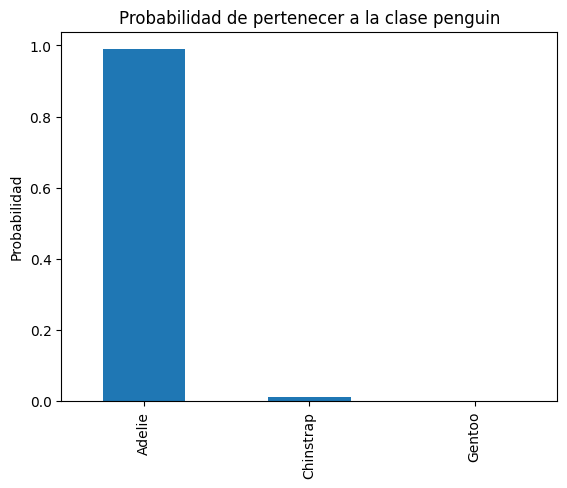

In [58]:
y_proba_class_0.plot.bar()
plt.ylabel("Probabilidad")
_ = plt.title("Probabilidad de pertenecer a la clase penguin")


También podemos calcular las diferentes probabilidades manualmente directamente desde la estructura de árbol.


In [59]:
adelie_proba = 103 / 161
chinstrap_proba = 52 / 161
gentoo_proba = 6 / 161
print(
    "Probabilidades de las distintas clases:\n"
    f"Adelie: {adelie_proba:.3f}\n"
    f"Chinstrap: {chinstrap_proba:.3f}\n"
    f"Gentoo: {gentoo_proba:.3f}\n"
)

Probabilidades de las distintas clases:
Adelie: 0.640
Chinstrap: 0.323
Gentoo: 0.037




También es importante señalar que por el momento no se ha tenido en cuenta la longitud en la variable `culmen`. Significa que cualquiera que sea el valor dado, no se utilizará durante la predicción.


In [60]:
sample_3 = pd.DataFrame(
    {"Culmen Length (mm)": [10_000], "Culmen Depth (mm)": [17]}
)
tree.predict_proba(sample_3)

array([[0. , 0.6, 0.4]])


Volviendo a nuestro problema de clasificación, la división encontrada con una profundidad máxima de 1 no es lo suficientemente potente como para separar las tres especies y la precisión del modelo es baja en comparación con el modelo lineal.


In [61]:
tree.fit(data_train, target_train)
test_score = tree.score(data_test, target_test)
print(f"Accuracy of the DecisionTreeClassifier: {test_score:.2f}")

Accuracy of the DecisionTreeClassifier: 0.97



De hecho, no es una sorpresa. Vimos anteriormente que una sola característica no podrá separar a las tres especies. Sin embargo, en el análisis anterior vimos que al utilizar ambas funciones deberíamos poder obtener resultados bastante buenos.

 En el siguiente ejercicio, aumentará el tamaño de la profundidad del árbol. Obtendrá intuiciones sobre cómo se repite la partición del espacio a lo largo del tiempo.



## Árbol de decisión de regresión

Presentamos cómo funcionan los árboles de decisión en problemas de regresión. Mostramos diferencias con los árboles de decisión presentados previamente en un entorno de clasificación.

 Primero, cargamos el conjunto de datos de pingüinos específicamente para resolver un problema de regresión.


In [192]:
import pandas as pd

penguins = pd.read_csv("./penguins_regression.csv")

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data_train, target_train = penguins[[feature_name]], penguins[target_name]


Para ilustrar cómo los árboles de decisión predicen en un entorno de regresión, crearemos un conjunto de datos sintéticos que contenga todas las longitudes posibles de aletas, desde el mínimo hasta el máximo de los datos originales.


In [193]:
import numpy as np

data_test = pd.DataFrame(
    np.arange(data_train[feature_name].min(), data_train[feature_name].max()),
    columns=[feature_name],
)


El término "prueba" aquí se refiere a datos que no se utilizaron para la capacitación. No debe confundirse con los datos provenientes de una división tren-prueba, ya que se generaron en intervalos equiespaciados para la evaluación visual de las predicciones.

 Tenga en cuenta que esto es metodológicamente válido aquí porque nuestro objetivo es obtener una comprensión intuitiva de la forma de la función de decisión de los árboles de decisión aprendidos.

 Sin embargo, calcular una métrica de evaluación en un conjunto de pruebas sintético de este tipo no tendría sentido ya que el conjunto de datos sintéticos no sigue la misma distribución que los datos del mundo real en los que se implementará el modelo.


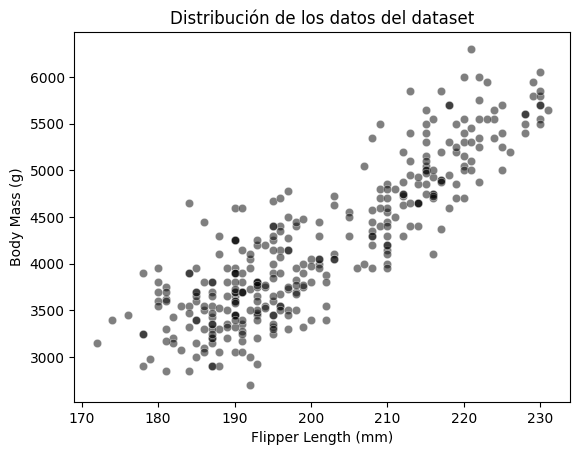

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
_ = plt.title("Distribución de los datos del dataset")


Primero ilustraremos la diferencia entre un modelo lineal y un árbol de decisión.


In [195]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(data_train, target_train)
target_predicted = linear_model.predict(data_test)

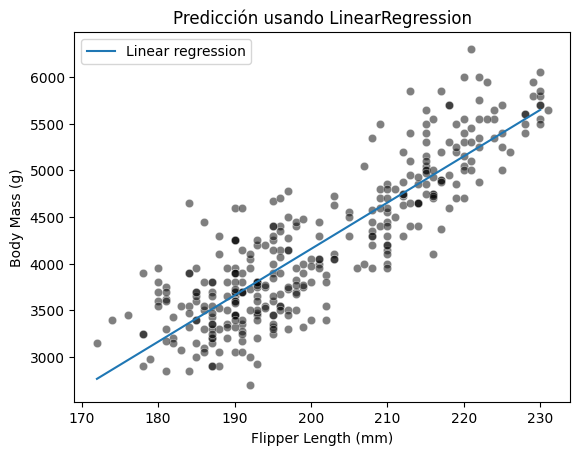

In [196]:
sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
plt.plot(data_test[feature_name], target_predicted, label="Linear regression")
plt.legend()
_ = plt.title("Predicción usando LinearRegression")


En el gráfico anterior, vemos que una `LinearRegression` no regularizada puede ajustarse a los datos. Una característica de este modelo es que todas las nuevas predicciones estarán en juego.


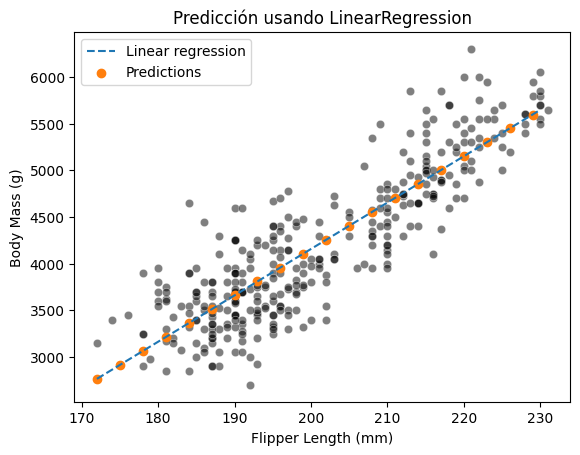

In [197]:
ax = sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
plt.plot(
    data_test[feature_name],
    target_predicted,
    label="Linear regression",
    linestyle="--",
)
plt.scatter(
    data_test[::3],
    target_predicted[::3],
    label="Predictions",
    color="tab:orange",
)
plt.legend()
_ = plt.title("Predicción usando LinearRegression")


A diferencia de los modelos lineales, los árboles de decisión son modelos no paramétricos: no hacen suposiciones sobre la forma en que se distribuyen los datos. Esto afectará el esquema de predicción. Repetir el experimento anterior resaltará las diferencias.


In [198]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=2)
tree.fit(data_train, target_train)
target_predicted = tree.predict(data_test)

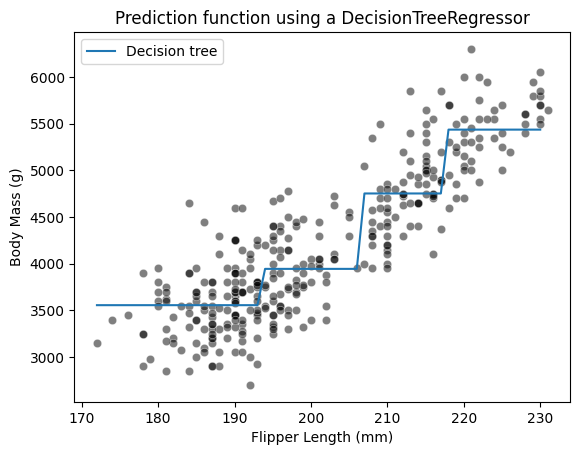

In [199]:
sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
plt.plot(data_test[feature_name], target_predicted, label="Decision tree")
plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")


Vemos que el modelo de árbol de decisión no tiene una distribución *a priori* para los datos y no terminamos con una línea recta para hacer una regresión de la longitud de las aletas y la masa corporal.

 En cambio, observamos que las predicciones del árbol son constantes por partes. De hecho, nuestro espacio funcional se dividió en dos particiones. Revisemos la estructura del árbol para ver cuál fue el umbral encontrado durante el entrenamiento.


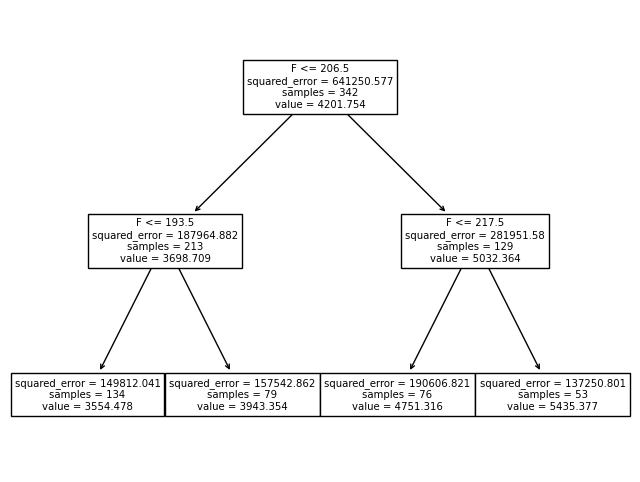

In [200]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(tree, feature_names=feature_name, ax=ax)


El umbral para nuestra función (longitud de la aleta) es 206,5 mm. Los valores predichos a cada lado de la división son dos constantes: 3698,71 gy 5032,36 g. Estos valores corresponden a los valores medios de las muestras de entrenamiento en cada partición.

 En la clasificación, vimos que aumentar la profundidad del árbol nos permitía obtener límites de decisión más complejos. Comprobemos el efecto de aumentar la profundidad en una configuración de regresión:


In [201]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(data_train, target_train)
target_predicted = tree.predict(data_test)

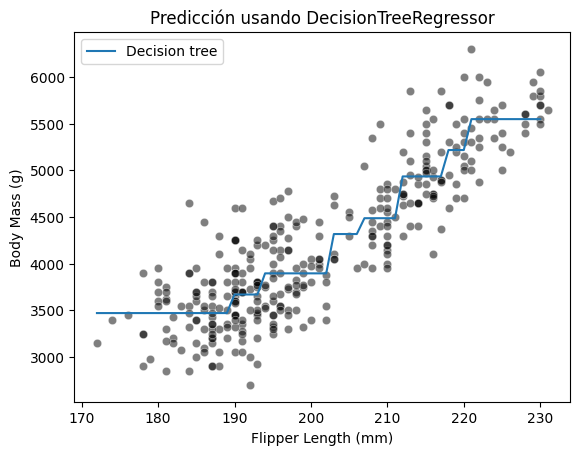

In [202]:
sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
plt.plot(data_test[feature_name], target_predicted, label="Decision tree")
plt.legend()
_ = plt.title("Predicción usando DecisionTreeRegressor")


Aumentar la profundidad del árbol aumentará el número de particiones y, por tanto, el número de valores constantes que el árbol es capaz de predecir.

Destacamos las diferencias en el comportamiento de un árbol de decisión utilizado en un problema de clasificación en contraste con un problema de regresión.



## Ejercicio 1

 En el cuaderno mostramos cómo funcionaba un árbol con una profundidad de 1 nivel. El objetivo de este ejercicio es repetir parte del experimento anterior para una profundidad con 2 niveles para mostrar cómo se repite el proceso de partición a lo largo del tiempo.

 Antes de comenzar, haremos:
-  cargar el conjunto de datos;
-  dividir el conjunto de datos en conjuntos de datos de entrenamiento y prueba;
-  defina la función para mostrar la función de decisión de clasificación.


In [203]:
import pandas as pd

penguins = pd.read_csv("./penguins_classification.csv")
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

In [204]:
from sklearn.model_selection import train_test_split

data, target = penguins[culmen_columns], penguins[target_column]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0
)


Cree un clasificador de árbol de decisión con una profundidad máxima de 2 niveles y ajuste los datos de entrenamiento. Una vez entrenado este clasificador, trace los datos y el límite de decisión para ver el beneficio de aumentar la profundidad. Para trazar el límite de decisión, debe importar la clase `DecisionBoundaryDisplay` del módulo `sklearn.inspection`.


In [205]:
#Escriba su código aquí.


¿Utilizamos la función "Longitud del culmen"? ¡Traza el árbol usando la función `sklearn.tree.plot_tree` para descubrirlo!


In [206]:
#Escriba su código aquí.


Calcule la precisión del árbol de decisión sobre los datos de prueba.


In [207]:
#Escriba su código aquí.


## Ejercicio 2

 El objetivo de este ejercicio es descubrir si un modelo de árbol de decisión es capaz de extrapolar.

 Por extrapolación, nos referimos a valores predichos por un modelo fuera del rango de valores de características observados durante el entrenamiento.

 Primero cargaremos los datos de regresión.


In [208]:
import pandas as pd

penguins = pd.read_csv("./penguins_regression.csv")

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data_train, target_train = penguins[[feature_name]], penguins[target_name]


Primero, cree dos modelos, un modelo de regresión lineal y un modelo de regresión de árbol de decisión, y ajústelos a los datos de entrenamiento. Limite la profundidad a 3 niveles para el árbol de decisión.


In [209]:
#Escriba su código aquí.


Cree un conjunto de datos sintéticos que contenga todas las longitudes posibles de aletas desde el mínimo hasta el máximo del conjunto de datos de entrenamiento. Obtenga las predicciones de cada modelo utilizando este conjunto de datos.


In [210]:
#Escriba su código aquí.


Cree un diagrama de dispersión que contenga las muestras de entrenamiento y superponga las predicciones de ambos modelos en la parte superior.


In [211]:
#Escriba su código aquí.


Ahora comprobaremos las capacidades de extrapolación de cada modelo. Cree un conjunto de datos que contenga un rango de valores más amplio que el conjunto de datos anterior; en otras palabras, agregue valores por debajo y por encima del mínimo y el máximo de la longitud de la aleta vista durante el entrenamiento.


In [212]:
#Escriba su código aquí.


Finalmente, haga predicciones con ambos modelos sobre este nuevo intervalo de datos. Repita el trazado del ejercicio anterior.


In [213]:
#Escriba su código aquí.


## Importancia de los hiperparámetros del árbol de decisión en la generalización

 A continuación, ilustraremos la importancia de algunos hiperparámetros clave en el árbol de decisión; Demostraremos sus efectos en los problemas de clasificación y regresión que vimos anteriormente.

 Primero, cargaremos los conjuntos de datos de clasificación y regresión.


In [238]:
import pandas as pd

data_clf_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_clf_column = "Species"
data_clf = pd.read_csv("./penguins_classification.csv")

In [239]:
data_reg_columns = ["Flipper Length (mm)"]
target_reg_column = "Body Mass (g)"
data_reg = pd.read_csv("./penguins_regression.csv")


### Crear funciones auxiliares

 Crearemos algunas funciones auxiliares para trazar las muestras de datos, así como el límite de decisión para la clasificación y la línea de regresión para la regresión.


In [240]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay


def fit_and_plot_classification(model, data, feature_names, target_names):
    model.fit(data[feature_names], data[target_names])
    if data[target_names].nunique() == 2:
        palette = ["tab:red", "tab:blue"]
    else:
        palette = ["tab:red", "tab:blue", "black"]
    DecisionBoundaryDisplay.from_estimator(
        model,
        data[feature_names],
        response_method="predict",
        cmap="RdBu",
        alpha=0.5,
    )
    sns.scatterplot(
        data=data,
        x=feature_names[0],
        y=feature_names[1],
        hue=target_names,
        palette=palette,
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")


def fit_and_plot_regression(model, data, feature_names, target_names):
    model.fit(data[feature_names], data[target_names])
    data_test = pd.DataFrame(
        np.arange(data.iloc[:, 0].min(), data.iloc[:, 0].max()),
        columns=data[feature_names].columns,
    )
    target_predicted = model.predict(data_test)

    sns.scatterplot(
        x=data.iloc[:, 0], y=data[target_names], color="black", alpha=0.5
    )
    plt.plot(data_test.iloc[:, 0], target_predicted, linewidth=4)


### Efecto del parámetro `max_depth`

 El hiperparámetro `max_depth` controla la complejidad general de un árbol de decisión. Este hiperparámetro permite lograr un equilibrio entre un árbol de decisión insuficientemente ajustado y demasiado ajustado. Construyamos un árbol poco profundo y luego un árbol más profundo, tanto para clasificación como para regresión, para comprender el impacto del parámetro.

 Primero podemos establecer el valor del parámetro `max_depth` en un valor muy bajo.


In [241]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

max_depth = 2
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
tree_reg = DecisionTreeRegressor(max_depth=max_depth)

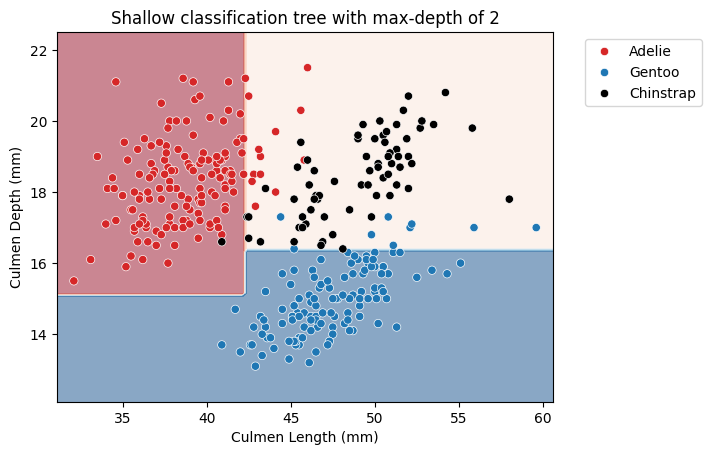

In [242]:
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column
)
_ = plt.title(f"Shallow classification tree with max-depth of {max_depth}")

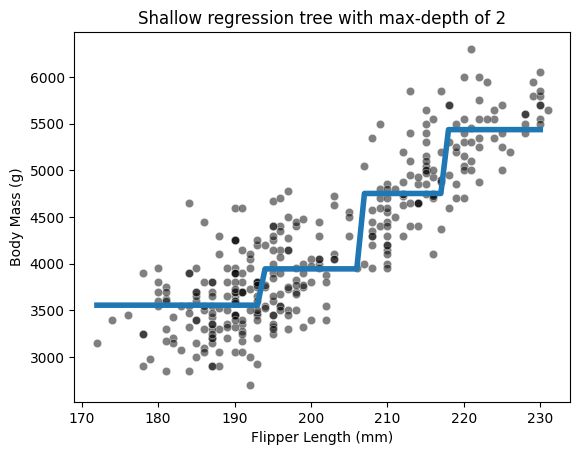

In [243]:
fit_and_plot_regression(
    tree_reg, data_reg, data_reg_columns, target_reg_column
)
_ = plt.title(f"Shallow regression tree with max-depth of {max_depth}")


Ahora, aumentemos el valor del parámetro `max_depth` para verificar la diferencia observando la función de decisión.


In [244]:
max_depth = 30
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
tree_reg = DecisionTreeRegressor(max_depth=max_depth)

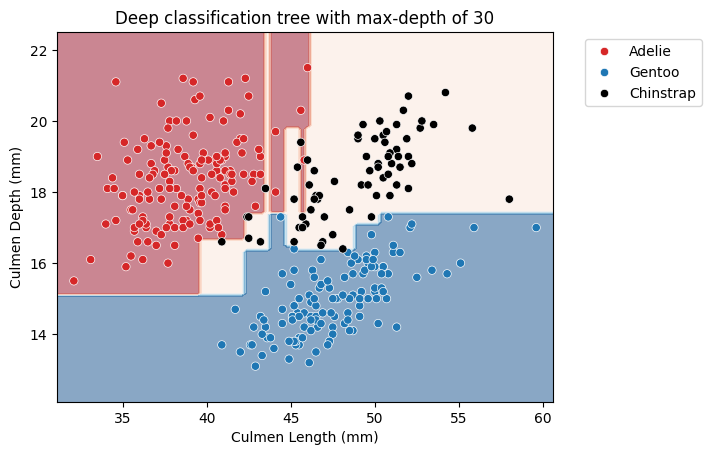

In [245]:
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column
)
_ = plt.title(f"Deep classification tree with max-depth of {max_depth}")

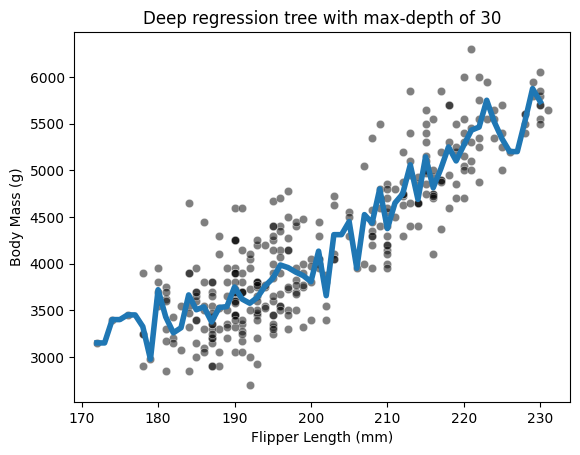

In [246]:
fit_and_plot_regression(
    tree_reg, data_reg, data_reg_columns, target_reg_column
)
_ = plt.title(f"Deep regression tree with max-depth of {max_depth}")


Tanto para la clasificación como para la configuración de regresión, observamos que aumentar la profundidad hará que el modelo de árbol sea más expresivo. Sin embargo, un árbol demasiado profundo sobreajustará los datos de entrenamiento, creando particiones que sólo son correctas para los "valores atípicos" (muestras ruidosas). `max_depth` es uno de los hiperparámetros que se deben optimizar mediante validación cruzada y búsqueda en cuadrícula.


In [247]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": np.arange(2, 10, 1)}
tree_clf = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid)
tree_reg = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid)

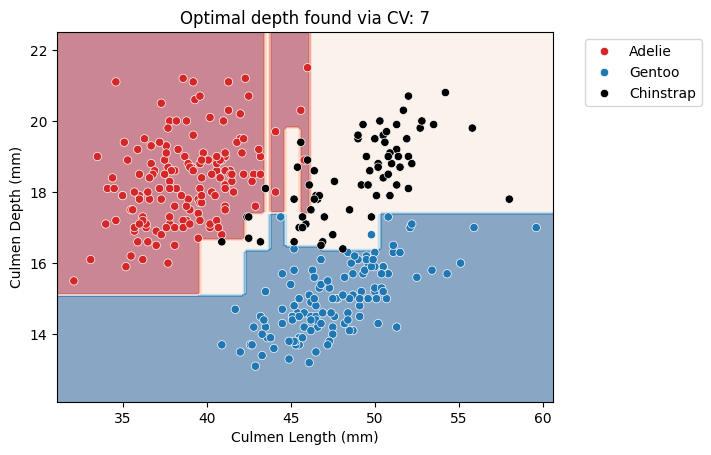

In [248]:
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column
)
_ = plt.title(
    f"Optimal depth found via CV: {tree_clf.best_params_['max_depth']}"
)

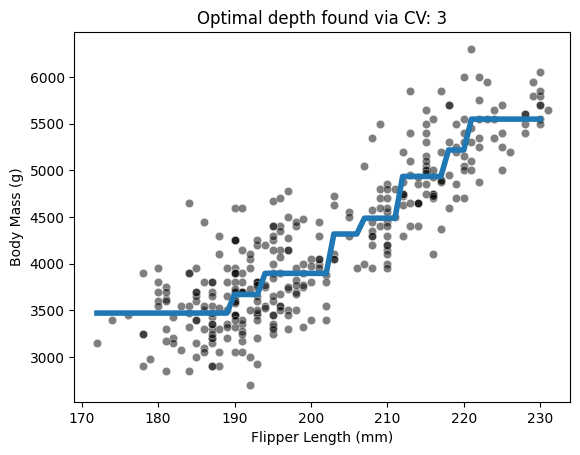

In [249]:
fit_and_plot_regression(
    tree_reg, data_reg, data_reg_columns, target_reg_column
)
_ = plt.title(
    f"Optimal depth found via CV: {tree_reg.best_params_['max_depth']}"
)


Con este ejemplo, vemos que no existe un único valor que sea óptimo para ningún conjunto de datos. Por lo tanto, es necesario optimizar este parámetro para cada aplicación.

###  Otros hiperparámetros en árboles de decisión

 El hiperparámetro `max_depth` controla la complejidad general del árbol. Este parámetro es adecuado bajo el supuesto de que un árbol está construido simétricamente. Sin embargo, no hay garantía de que un árbol sea simétrico. De hecho, se podría alcanzar un rendimiento óptimo de generalización haciendo que algunas de las ramas crezcan más que otras.

 Construiremos un conjunto de datos donde ilustraremos esta asimetría. Generaremos un conjunto de datos compuesto por 2 subconjuntos: un subconjunto donde el árbol debe encontrar una separación clara y otro subconjunto donde se mezclarán muestras de ambas clases. Implica que un árbol de decisión necesitará más divisiones para clasificar adecuadamente las muestras del segundo subconjunto que las del primer subconjunto.


In [258]:
from sklearn.datasets import make_blobs

data_clf_columns = ["Feature #0", "Feature #1"]
target_clf_column = "Class"

# Blobs that will be interlaced
X_1, y_1 = make_blobs(
    n_samples=300, centers=[[0, 0], [-1, -1]], random_state=0
)
# Blobs that will be easily separated
X_2, y_2 = make_blobs(n_samples=300, centers=[[3, 6], [7, 0]], random_state=0)

X = np.concatenate([X_1, X_2], axis=0)
y = np.concatenate([y_1, y_2])
data_clf = np.concatenate([X, y[:, np.newaxis]], axis=1)
data_clf = pd.DataFrame(
    data_clf, columns=data_clf_columns + [target_clf_column]
)
data_clf[target_clf_column] = data_clf[target_clf_column].astype(np.int32)

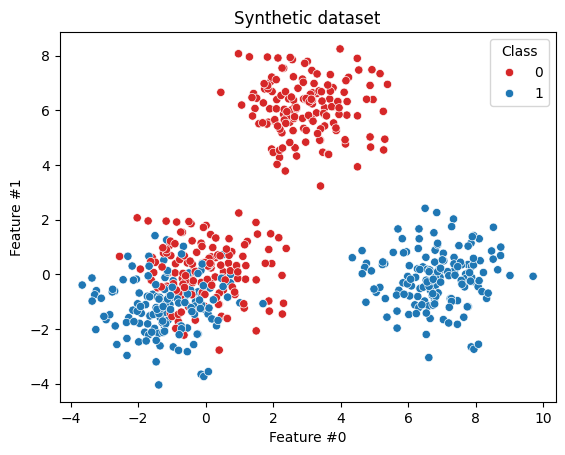

In [259]:
sns.scatterplot(
    data=data_clf,
    x=data_clf_columns[0],
    y=data_clf_columns[1],
    hue=target_clf_column,
    palette=["tab:red", "tab:blue"],
)
_ = plt.title("Synthetic dataset")


Primero entrenaremos un árbol de decisión superficial con `max_depth=2` . Esperaríamos que esta profundidad fuera suficiente para separar las manchas que son fáciles de separar.


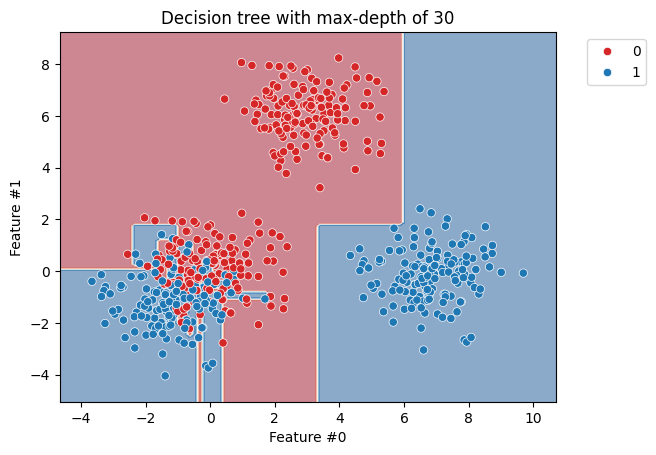

In [263]:
max_depth = 30
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column
)
_ = plt.title(f"Decision tree with max-depth of {max_depth}")


Como era de esperar, vemos que la mancha azul de la derecha y la mancha roja de arriba se separan fácilmente. Sin embargo, se necesitarán más divisiones para dividir mejor el blob si se mezclan puntos de datos azules y rojos.

 De hecho, vemos que la mancha roja en la parte superior y la mancha azul a la derecha del gráfico están perfectamente separadas. Sin embargo, el árbol todavía comete errores en el área donde se mezclan las manchas. Comprobemos la representación del árbol.


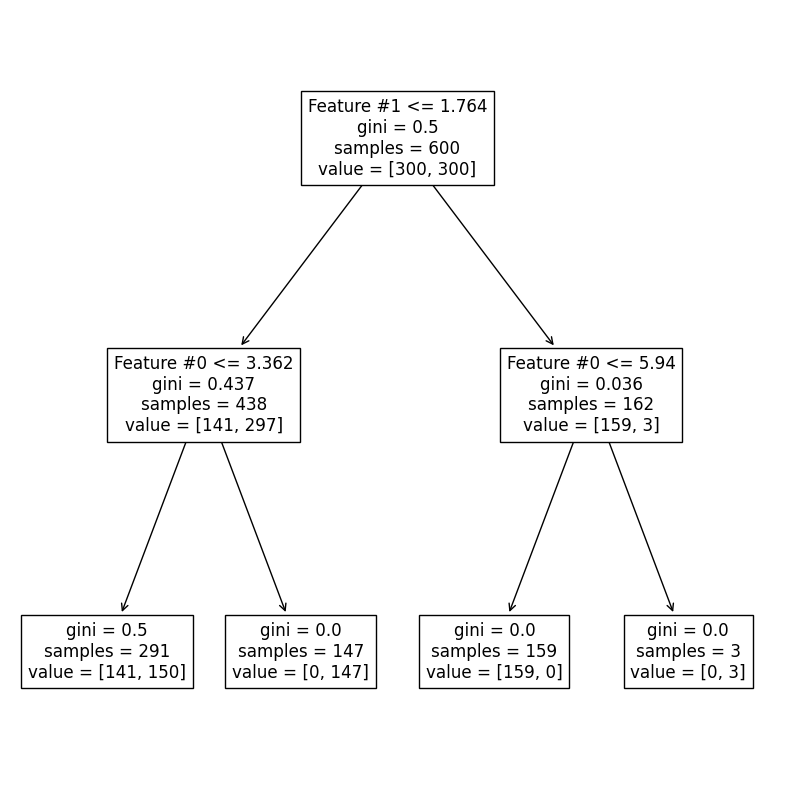

In [253]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(10, 10))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)


Vemos que la rama derecha logra una clasificación perfecta. Ahora, aumentamos la profundidad para comprobar cómo crecerá el árbol.


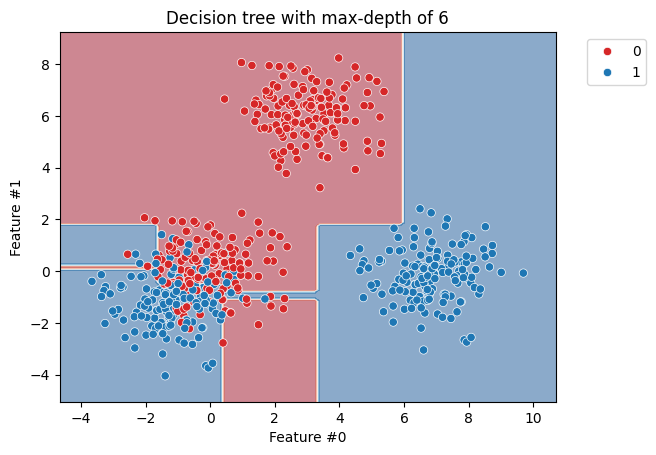

In [254]:
max_depth = 6
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column
)
_ = plt.title(f"Decision tree with max-depth of {max_depth}")

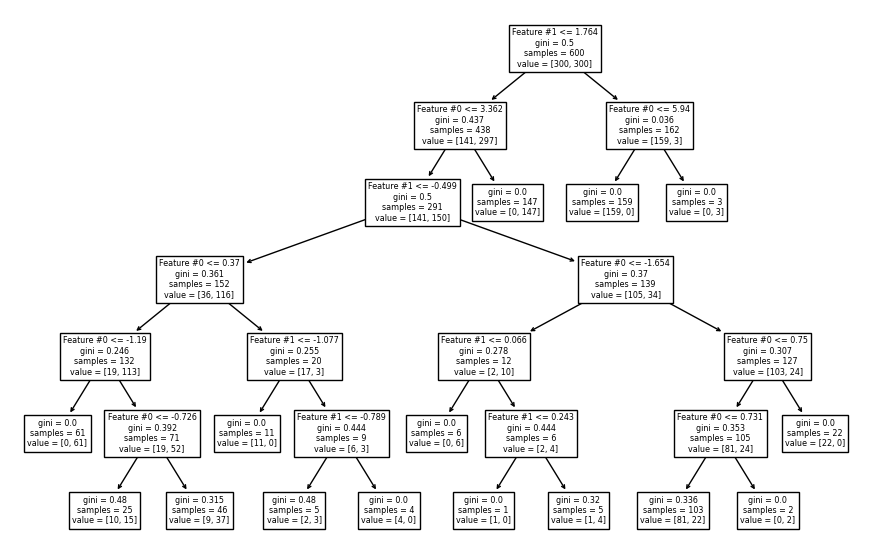

In [255]:
_, ax = plt.subplots(figsize=(11, 7))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)


Como era de esperar, la rama izquierda del árbol continuó creciendo mientras que no se realizaron más divisiones en la rama derecha. Arreglar el parámetro `max_depth` cortaría el árbol horizontalmente en un nivel específico, sea o no más beneficioso que una rama siga creciendo.

 Los hiperparámetros `min_samples_leaf` , `min_samples_split` , `max_leaf_nodes` o `min_impurity_decrease` permiten cultivar árboles asimétricos y aplicar una restricción a nivel de hojas o nodos. Comprobaremos el efecto de `min_samples_leaf` .


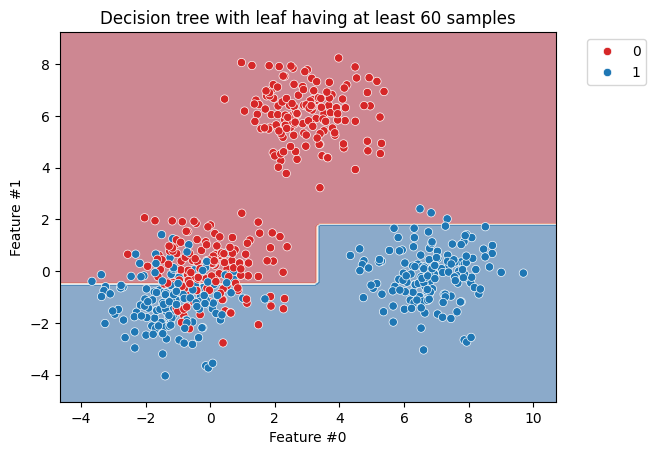

In [256]:
min_samples_leaf = 60
tree_clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column
)
_ = plt.title(
    f"Decision tree with leaf having at least {min_samples_leaf} samples"
)

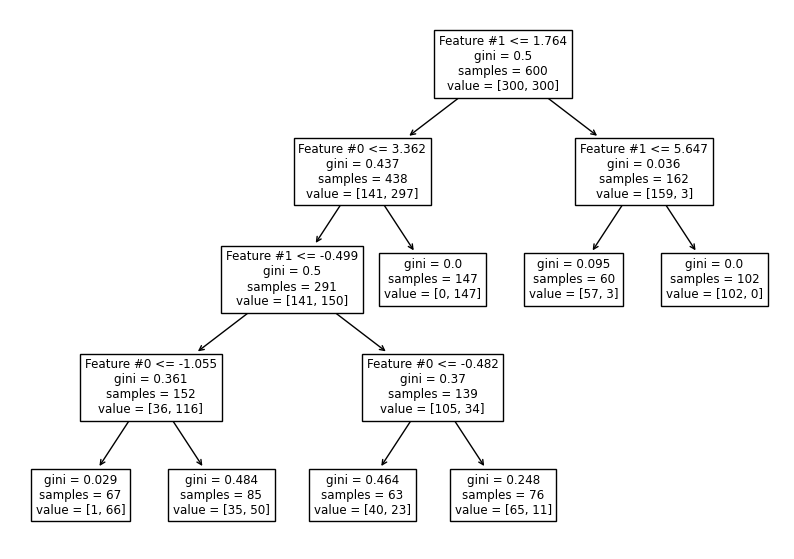

In [257]:
_, ax = plt.subplots(figsize=(10, 7))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)


Este hiperparámetro permite tener hojas con un número mínimo de muestras y de lo contrario no se buscarán más divisiones. Por lo tanto, estos hiperparámetros podrían ser una alternativa para corregir el hiperparámetro `max_depth` .
